In [1]:
from collections import defaultdict

def color_guess (target, guess,wd_len=5):
    """
    This version appears to fix the duplicate
    letters bug.
    """
    def wd_dict(wd):
        dd = defaultdict(set)
        for (i,l) in enumerate(wd):
            dd[l].add(i)
        return dd

    coloring = list('k'*5)
    tgt_dict,guess_dict = wd_dict(target),wd_dict(guess)
    for let in set(guess):
        gs_toks,tgt_toks = guess_dict[let],tgt_dict[let]
        gs = gs_toks & tgt_toks
        hits, max_hits = 0, len(tgt_toks)
        for gs_i in gs:
            coloring[gs_i] = 'g'
            hits += 1
        # We have yellows to assign
        for gs_i in gs_toks - gs:
            if tgt_toks and hits < max_hits:
                coloring[gs_i] = 'y'
                hits += 1
    return ''.join((coloring))


In [2]:
color_guess ("sunny", "valve")

'kkkkk'

In [17]:
import pandas as pd
df = pd.read_csv("https://www.kilgarriff.co.uk/BNClists/lemma.num",header=None,sep = " ", names= ("Rank","Freq","Word","Pos"))
#df = df.set_index("Word")
df

,Rank,Freq,Word,Pos
0,1,6187267,the,det
1,2,4239632,be,v
2,3,3093444,of,prep
3,4,2687863,and,conj
4,5,2186369,a,det
...,...,...,...,...
6313,6314,801,decision-making,n
6314,6315,800,wildly,adv
6315,6316,800,reformer,n
6316,6317,800,quantum,n


In [18]:
pd.pivot_table(df,index="Pos",values="Freq",aggfunc="sum").sort_values(by="Freq",ascending=False)

,Freq
Pos,
n,17737655
v,16251437
det,13425305
prep,11487866
adv,6197187
pron,6104169
conj,5782063
a,5397318
infinitive-marker,1620850


Equivalently (except that it results in a series rather than a DataFrame):

In [21]:
df.groupby("Pos")["Freq"].sum().sort_values(ascending=False)

Pos
n                    17737655
v                    16251437
det                  13425305
prep                 11487866
adv                   6197187
pron                  6104169
conj                  5782063
a                     5397318
infinitive-marker     1620850
modal                 1457053
interjection           253323
Name: Freq, dtype: int64

In [22]:
from IPython.display import SVG

In [29]:
!echo 'digraph "" { a[fillcolor=red,style=filled] }' | dot -Tsvg > a.svg

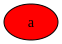

In [30]:
SVG('a.svg')

In [31]:
!echo 'digraph "" { x[image="a.svg", shape=none, label=""]; x -> x}' | dot -Tsvg > b.svg

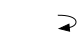

In [32]:
SVG('b.svg')